# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.


* There is no strong relationship between latitude and humidity. However, the majority of cities have a humidity between 60-100% with most at 100%
* Between lat -20 and 0 the humidity is mostly in the 80-100% range
* The northern hemisphere has more of a variety of windspeeds. Perhaps do to the tilt of the earth.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities_df = pd.DataFrame()

cities_df["City"] = cities
cities_df["Cloudiness"]=""
cities_df["Country"]=""
cities_df["Date"]=""
cities_df["Humidity"]=""
cities_df["Lat"]=""
cities_df["Lng"]=""
cities_df["Max Temp"]=""
cities_df["Wind Speed"]=""

cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,los llanos de aridane,,,,,,,,
1,puerto ayora,,,,,,,,
2,rikitea,,,,,,,,
3,opobo,,,,,,,,
4,norman wells,,,,,,,,


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="

print("Beginning Data Retrieval")
print("-----------------------------")
record_count = 1
set_count = 1

for index, row in cities_df.iterrows():
    city_name = row["City"]
    try:
        response = requests.get(f"{url}{city_name}").json()
        print(f"Processing Record {record_count} of Set {set_count} | {city_name}")
        
        cities_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_df.loc[index, "Country"] = response["sys"]["country"]
        cities_df.loc[index, "Date"] = response["dt"]
        cities_df.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_df.loc[index, "Lat"] = response["coord"]["lat"]
        cities_df.loc[index, "Lng"] = response["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        
        time.sleep(2)
        record_count += 1
        if record_count > 50:
            set_count += 1
            record_count = 1
    except:
        print("City not found. Skipping...")
    continue
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | los llanos de aridane
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | opobo
City not found. Skipping...
Processing Record 4 of Set 1 | norman wells
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | upington
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | pensacola
Processing Record 10 of Set 1 | ariquemes
Processing Record 11 of Set 1 | porto torres
Processing Record 12 of Set 1 | babu
Processing Record 13 of Set 1 | alta floresta
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | sumbe
Processing Record 16 of Set 1 | kavieng
Processing Record 17 of Set 1 | vuktyl
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | aklavik
Processing Record 20 of Set 1 | louisbourg
City not found. Skipping...
Processing R

Processing Record 4 of Set 4 | arraial do cabo
Processing Record 5 of Set 4 | sines
Processing Record 6 of Set 4 | bababe
City not found. Skipping...
Processing Record 6 of Set 4 | podor
Processing Record 7 of Set 4 | high level
Processing Record 8 of Set 4 | verkhnyaya balkariya
Processing Record 9 of Set 4 | coihaique
Processing Record 10 of Set 4 | daxian
City not found. Skipping...
Processing Record 10 of Set 4 | novikovo
Processing Record 11 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 4 | cordele
Processing Record 12 of Set 4 | okhotsk
Processing Record 13 of Set 4 | katsuura
Processing Record 14 of Set 4 | olinda
Processing Record 15 of Set 4 | hilo
Processing Record 16 of Set 4 | port lincoln
Processing Record 17 of Set 4 | kyra
City not found. Skipping...
Processing Record 17 of Set 4 | waingapu
Processing Record 18 of Set 4 | geresk
City not found. Skipping...
Processing Record 18 of Set 4 | mucuri
Processing Record 19 of Set 4 | ust-kuyga
P

Processing Record 14 of Set 7 | vaitupu
City not found. Skipping...
Processing Record 14 of Set 7 | kijang
Processing Record 15 of Set 7 | zabol
Processing Record 16 of Set 7 | berea
Processing Record 17 of Set 7 | lardos
Processing Record 18 of Set 7 | leh
Processing Record 19 of Set 7 | iberia
Processing Record 20 of Set 7 | vega de alatorre
Processing Record 21 of Set 7 | port hueneme
Processing Record 22 of Set 7 | kumluca
Processing Record 23 of Set 7 | payo
Processing Record 24 of Set 7 | fare
Processing Record 25 of Set 7 | visnes
Processing Record 26 of Set 7 | vardo
Processing Record 27 of Set 7 | antrim
Processing Record 28 of Set 7 | vite
Processing Record 29 of Set 7 | shelburne
Processing Record 30 of Set 7 | bac lieu
City not found. Skipping...
Processing Record 30 of Set 7 | kuche
City not found. Skipping...
Processing Record 30 of Set 7 | wanxian
Processing Record 31 of Set 7 | malwan
City not found. Skipping...
Processing Record 31 of Set 7 | bermejo
Processing Record 

Processing Record 32 of Set 10 | namuac
Processing Record 33 of Set 10 | aswan
Processing Record 34 of Set 10 | kieta
Processing Record 35 of Set 10 | doka
Processing Record 36 of Set 10 | salumbar
Processing Record 37 of Set 10 | veraval
Processing Record 38 of Set 10 | zelezna ruda
Processing Record 39 of Set 10 | kaoma
Processing Record 40 of Set 10 | tabou
Processing Record 41 of Set 10 | vedaranniyam
City not found. Skipping...
Processing Record 41 of Set 10 | gold coast
Processing Record 42 of Set 10 | hunza
City not found. Skipping...
Processing Record 42 of Set 10 | hovd
Processing Record 43 of Set 10 | port hedland
Processing Record 44 of Set 10 | port-gentil
Processing Record 45 of Set 10 | faya
Processing Record 46 of Set 10 | minden
Processing Record 47 of Set 10 | ugoofaaru
Processing Record 48 of Set 10 | ladario
Processing Record 49 of Set 10 | magistralnyy
Processing Record 50 of Set 10 | nome
Processing Record 1 of Set 11 | piuma
Processing Record 2 of Set 11 | dodge c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
cities_df.count()

City          626
Cloudiness    626
Country       626
Date          626
Humidity      626
Lat           626
Lng           626
Max Temp      626
Wind Speed    626
dtype: int64

In [8]:
cities_df.to_csv('cities_weather.csv')

In [9]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,los llanos de aridane,20,ES,1553328019,59,28.66,-17.92,62.6,13.87
1,puerto ayora,8,EC,1553328265,99,-0.74,-90.35,75.01,4.83
2,rikitea,88,PF,1553328267,99,-23.12,-134.97,78.88,20.49
3,opobo,,,,,,,,
4,norman wells,75,CA,1553324400,73,65.28,-126.83,19.4,19.46


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [10]:
cities_df["Cloudiness"] = pd.to_numeric(cities_df["Cloudiness"])
cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"])
cities_df["Lat"] = pd.to_numeric(cities_df["Lat"])
cities_df["Lng"] = pd.to_numeric(cities_df["Lng"])
cities_df["Max Temp"] = pd.to_numeric(cities_df["Max Temp"])
cities_df["Wind Speed"] = pd.to_numeric(cities_df["Wind Speed"])

In [11]:
cities_df.dtypes

City           object
Cloudiness    float64
Country        object
Date           object
Humidity      float64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

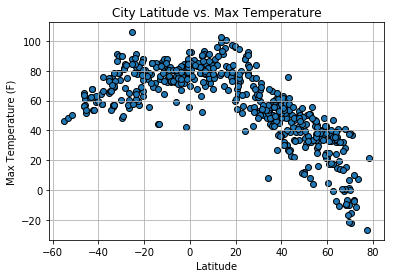

In [17]:
plt.scatter(cities_df["Lat"],cities_df["Max Temp"],marker="o",edgecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Lat_vs_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

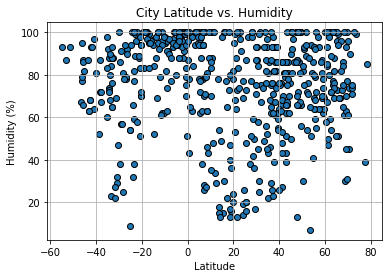

In [18]:
plt.scatter(cities_df["Lat"],cities_df["Humidity"],marker="o",edgecolors="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Lat_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

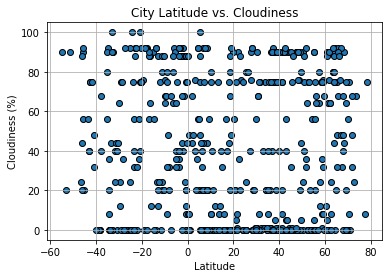

In [19]:
plt.scatter(cities_df["Lat"],cities_df["Cloudiness"],marker="o",edgecolors="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Lat_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

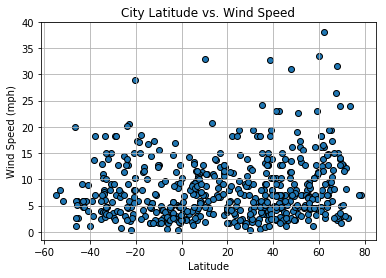

In [20]:
plt.scatter(cities_df["Lat"],cities_df["Wind Speed"],marker="o",edgecolors="black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Lat_vs_Wind.png")
plt.show()